# Лабораторна робота №3

### Частина №1

Генеруємо 10^4 випадкових величин, розподілених за законом розподілу Пуассона.

In [15]:
X <- rpois(10000, lambda=5)

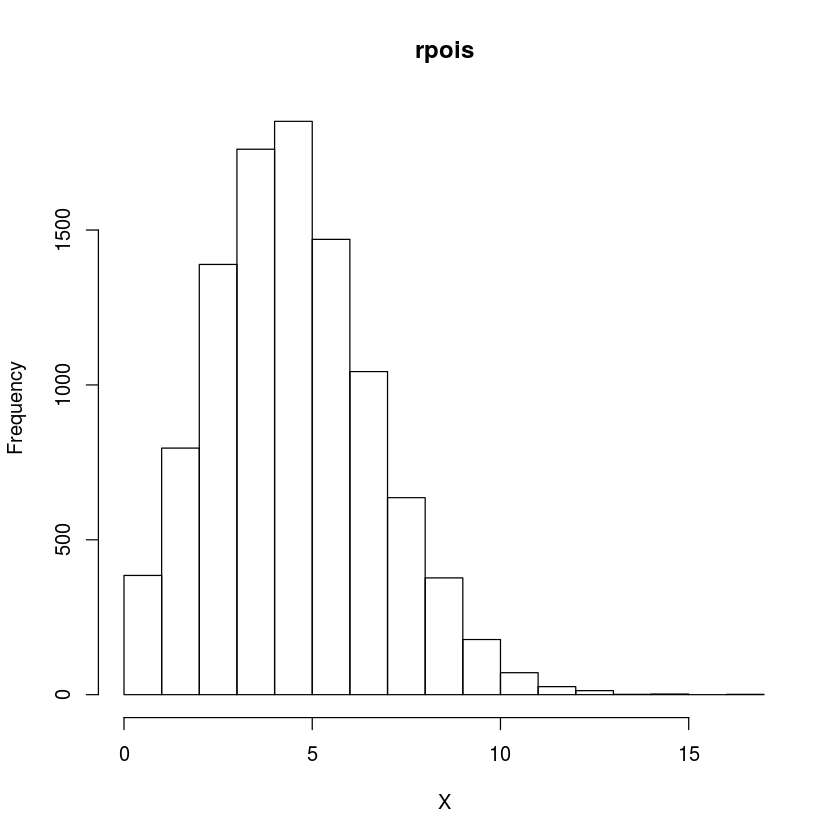

In [16]:
hist(X, main="rpois")